# Assignment 2
- Ilyani Shahnaz binti Shukor (1201101761)
- Anis Hazirah binti Mohamad Sabry (1211300373)
- Nuha Awadah binti Mohd Yusof (1211303209)
- Amierlyn binti Azman (1201101750)

## Task 1 : Difference in Execution Time between 2 Computers



For the first task, we implemented the Haversine formula into a function to solve our code.The Haversine formula determines the *great-circle distance* between two points on a sphere with their longitudes and latitudes. We have used the latitudes and the longitudes from the sample csv data given and transferred the data into the formula. For this method, we have used the `pandas` library to load data from the csv files. The Haversine Formula is as follows : 

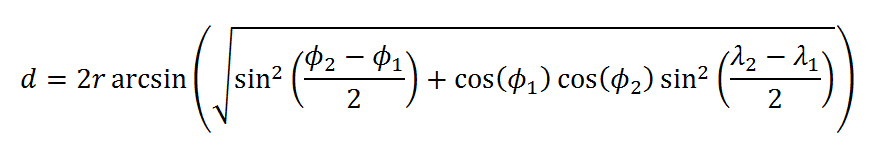

In [3]:
import pandas as pd

ppl = pd.read_csv("people.csv")
ppv = pd.read_csv("ppv.csv")

from math import radians, cos, sin, asin, sqrt
def haversine(lat1, long1, lat2, long2):

    #Conversion of coordinates into radian
    lat1, long1, lat2, long2 = map(radians, [lat1, long1, lat2, long2])
    # Haversine Formula
    dlon = long2 - long1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Multiplied by the radius of the earth = 6371km
    km = 6371* c
    return km

#Applying haversine formula to find the shortest distance from every person to all PPVs
def nearest(lat,long):
  distance = ppv.apply(lambda row: haversine(lat, long, row['Lat'], row['Lon']), axis=1)
  return ppv.loc[distance.idxmin(),'PPV']

#Adding an additional column (PPV) for each consecutive matches
ppl['PPV'] = ppl.apply(lambda row: nearest(row['Lat'], row['Lon']),axis=1)

#Merging both people.csv and ppv.csv with their designated latitudes and longitudes
ppl = pd.merge(ppl, ppv[['PPV', 'Lat', 'Lon']], on='PPV', how='left')

#Renaming the columns due to similar column naming, so that python does not get confused
ppl = ppl.rename(columns = {'Lat_x':'p_lat','Lon_x': 'p_lon','Lat_y':'v_lat','Lon_y':'v_lon'})

#Adding an additional column (distance) which shows the distance by applying the haversine formula
ppl['distance'] =[haversine(ppl.p_lat[i], ppl.p_lon[i], ppl.v_lat[i], ppl.v_lon[i]) for i in range(len(ppl))]
ppl['distance'] = ppl['distance'].round(decimals=4)

ppl.head()

,People,p_lat,p_lon,PPV,v_lat,v_lon,distance
0,0,2.868615,101.673326,0,2.864831,101.694876,2.4299
1,1,2.878383,101.607508,44,2.892748,101.595468,2.0831
2,2,2.871754,101.599514,44,2.892748,101.595468,2.3773
3,3,3.027363,101.652546,2,3.020707,101.650831,0.7642
4,4,2.997368,101.626043,19,3.010185,101.611975,2.1145


### Statistical Analysis

We have ran the code above on two different computers to analyze the execution time for 50 times. The specifications of the computers are as follows :

*Computer 1 - Acer Aspire A515-52*

> 
1.   RAM : 12GB
2.   Hard Disk Type : KINGSTON RBUSNS8154P3256GJ1
3.   CPU : Intel(R) Core(TM) i3-8145U CPU @ 2.10GHz   2.30 GHz


*Computer 2 - HP ENVY X360 Convertible*
1.   RAM : 8GB
2.   Hard Disk Type : SAMSUNG MZVLW256HEHP-000H1
3.   CPU : AMD Ryzen 5 25000U with Radeon Vega Mobile Gfx 2.00 GHz

Consecutively, we are asked to measure the execution time for both of the computers for a total number of 50 runs. To do this, we implemented the while loop with a counter of 50 times. We have also imported the library `timeit` and `datatime` to act as our timer for more accurate measurement of execution time. The code below is used to measure the execution time for each runs. Then, the data is collected and stored in 'Task1.csv' file. To analyze the distribution difference, we have plotted a shaded density plot diagram using the collected data using `seaborn` and `matplotlib` libraries

In [ ]:
from timeit import default_timer as timer
from datetime import timedelta

count = 0
while count < 50:

  start = timer()

  import pandas as pd
  import numpy as np

  ppl = pd.read_csv("people.csv")
  ppv = pd.read_csv("ppv.csv")

  from math import radians, cos, sin, asin, sqrt
  def haversine(lat1, long1, lat2, long2):

      #Conversion of coordinates into radian
      lat1, long1, lat2, long2 = map(radians, [lat1, long1, lat2, long2])
      # Haversine Formula
      dlon = long2 - long1 
      dlat = lat2 - lat1 
      a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
      c = 2 * asin(sqrt(a)) 
      # Multiplied by the radius of the earth = 6371km
      km = 6371* c
      return km

  #Applying haversine formula to find the shortest distance from every person to all PPVs
  def nearest(lat,long):
    distance = ppv.apply(lambda row: haversine(lat, long, row['Lat'], row['Lon']), axis=1)
    return ppv.loc[distance.idxmin(),'PPV']

  #Adding an additional column (PPV) for each consecutive matches
  ppl['PPV'] = ppl.apply(lambda row: nearest(row['Lat'], row['Lon']),axis=1)

  #Merging both people.csv and ppv.csv with their designated latitudes and longitudes
  ppl = pd.merge(ppl, ppv[['PPV', 'Lat', 'Lon']], on='PPV', how='left')

  #Renaming the columns due to similar column naming, so that python does not get confused
  ppl = ppl.rename(columns = {'Lat_x':'p_lat','Lon_x': 'p_lon','Lat_y':'v_lat','Lon_y':'v_lon'})

  #Adding an additional column (distance) which shows the distance by applying the haversine formula
  ppl['distance'] =[haversine(ppl.p_lat[i], ppl.p_lon[i], ppl.v_lat[i], ppl.v_lon[i]) for i in range(len(ppl))]
  ppl['distance'] = ppl['distance'].round(decimals=4)

  ppl.head()

  end = timer()
  print(timedelta(seconds=end-start))


In [ ]:
Task1 = pd.read_csv('Task1.csv')
#pd.set_option("max_rows", None)
Task1.head()

,No.,Acer Aspire A515-52,HP ENVY X360 Convertible
0,1,33.619412,28.802692
1,2,24.127343,32.041311
2,3,23.348929,29.272291
3,4,22.439090,39.508966
4,5,22.452001,29.719710


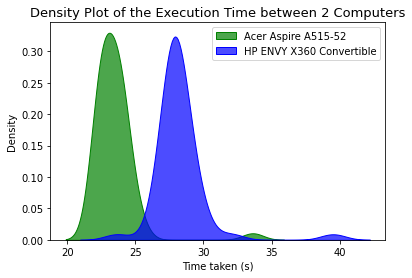

In [ ]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
df = pandas.DataFrame(Task1, columns=['No.','Acer Aspire A515-52','HP ENVY X360 Convertible']) 
 
# plotting both distibutions on the same figure
fig = sns.kdeplot(df['Acer Aspire A515-52'], shade=True, color="g", label="Acer Aspire A515-52", alpha=.7)
fig = sns.kdeplot(df['HP ENVY X360 Convertible'], shade=True, color="b", label="HP ENVY X360 Convertible", alpha=.7)


plt.title('Density Plot of the Execution Time between 2 Computers', fontsize=13)
plt.xlabel('Time taken (s)')
plt.ylabel('Density')
plt.legend()
plt.show()

## Task 2: Difference in Execution Time between 3 Different Methods

### Method 1 : Geodesic Distance

This method uses the `pandas` library to access data from the given CSVs. To calculate the shortest distance between two latitude-longitude points, we have applied the Geodesic Distance by importing the function 'geopy.distance.geodesic' from `geopy` library

**Packages** : `pandas`, `geopy`

**Type of loop** : for-loop 

**Formula** : Geodesic Distance

In [ ]:
import pandas as pd
from geopy.distance import geodesic as gd

ppl = pd.read_csv('people.csv')
ppv = pd.read_csv('ppv.csv')

df = pd.DataFrame(ppl, columns=['People','Lat','Lon'])
df2 = pd.DataFrame(ppv, columns=['PPV', 'Lat','Lon'])


for i, row in df.iterrows():
    ppl = row.Lat, row.Lon
    distances = []
    for j, row2 in df2.iterrows():
        ppv = row2.Lat, row2.Lon
        distances.append(gd(ppl,ppv).km)
    min_distance = min(distances)
    min_index = distances.index(min_distance)
    print("Person", i, "is closest to PPV", min_index, "by", min_distance, "km")


#### Timing Execution


In [ ]:
from timeit import default_timer as timer
from datetime import timedelta

count = 0
while count < 50:

  start = timer()
  import pandas as pd
  from geopy.distance import geodesic as gd

  ppl = pd.read_csv('people.csv')
  ppv = pd.read_csv('ppv.csv')

  df = pd.DataFrame(ppl, columns=['People','Lat','Lon'])
  df2 = pd.DataFrame(ppv, columns=['PPV', 'Lat','Lon'])

  for i, row in df.iterrows():
    ppl = row.Lat, row.Lon
    distances = []
    for j, row2 in df2.iterrows():
        ppv = row2.Lat, row2.Lon
        distances.append(gd(ppl,ppv).km)
    min_distance = min(distances)
    min_index = distances.index(min_distance)
  
  end = timer()
  duration = timedelta(seconds=end-start)
  print('Time Taken for', count, 'run: ', duration)
  count += 1

### Method 2 : Haversine Equation


We have again applied **the Haversine Equation** to calculate the shortest distance between each person to their closest PPV centers. However, this method differs from the original equation. Instead of defining a Haversine function, we have imported the `haversine` library to compute the calculation. 

This method differs from the above code in terms of the library used as the data reader. Instead of using `pandas`, we imported the `csv` library to read the CSV

**Packages** : `csv`, `haversine`

**Type of loop** : for-loop

**Formula** : Haversine Equation

In [ ]:
!pip install haversine

In [ ]:
#Using csv library
#Using import haversine

import csv
import haversine as hs

with open('people.csv','r') as csvfile:
    dr = csv.DictReader(csvfile)
    for row in dr:
        csvfile = float(row['Lat']), float(row['Lon'])
        distance = []
        with open('ppv.csv','r') as csvfile2:
          dr2 = csv.DictReader(csvfile2)
          for row2 in dr2:
            csvfile2 = float(row2['Lat']), float(row2['Lon'])
            distance.append(hs.haversine(csvfile,csvfile2))
        min_distance = min(distance)
        min_index = distance.index(min_distance)
        print("Person",row['People'], "is closest to PPV", min_index, "by", min_distance, "KM")

#### Time Execution

In [ ]:
from timeit import default_timer as timer
from datetime import timedelta

count = 0
while count < 50:
  start = timer()

  import csv
  import haversine as hs

  with open('people.csv','r') as csvfile:
      dr = csv.DictReader(csvfile)
      for row in dr:
          csvfile = float(row['Lat']), float(row['Lon'])
          distance = []
          with open('ppv.csv','r') as csvfile2:
            dr2 = csv.DictReader(csvfile2)
            for row2 in dr2:
              csvfile2 = float(row2['Lat']), float(row2['Lon'])
              distance.append(hs.haversine(csvfile,csvfile2))
          min_distance = min(distance)
          min_index = distance.index(min_distance)
          
  end = timer()
  duration = timedelta(seconds=end-start)
  print('Time Taken for', count, 'run: ', duration)
  count += 1


# Method 3 : Using Pythagoras Theorem 

For the third method, we implemented the Pythagoras formula into a function to solve our code. Pythagoras formula is much simpler in comparison to the Haversine formula since it does not consider the curvature of the earth. In short, it uses both the latitude and longitude from the CSV files as points in a 2-dimensional place and finding the shortest length to go from one point to the other. The method also use lambda function to apply the pythagoras theorem to each of the row in the file instead of using a for or a while loop. 

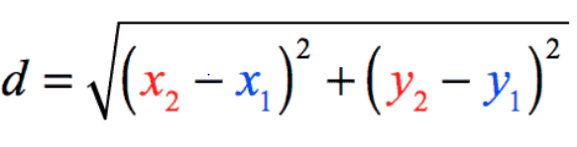

**Packages** : `pandas`, `math`

**Type of loop** : Lambda function 

**Formula** : Pythagoras Theorem


In [ ]:
import pandas as pd
import math

ppl = pd.read_csv("people.csv")
ppv = pd.read_csv("ppv.csv")

## pythagoras theorem function
def pythagoras(lat1,lon1,lat2,lon2):
    a2 = float(lat2 - lat1) ** 2
    b2 = float(lon2 - lon1) ** 2
    c2 = a2 + b2
    return math.sqrt(c2)

## nearest function - using panda idxmin built in to choose the min distance with column ppv
def nearest(lat,long):
    distance = ppv.apply(lambda row: pythagoras(lat, long, row['Lat'], row['Lon']), axis=1) # apply - apply the csv with what, lambda row/col - applying each row with which function
    return ppv.loc[distance.idxmin(),'PPV']  # .loc - selecting the row, picking the minimum using idxmin - under pandas df

## the main code
ppl['PPV'] = ppl.apply(lambda row: nearest(row['Lat'], row['Lon']),axis=1) ## looping using the nearest function


ppl = pd.merge(ppl, ppv[['PPV', 'Lat', 'Lon']], on='PPV', how='left')
ppl = ppl.rename(columns = {'Lat_x':'People_Lat','Lon_x': 'People_Lon','Lat_y':'PPV_Lat','Lon_y':'PPV_Lon'})
ppl['distance'] =[pythagoras(ppl.People_Lat[i], ppl.People_Lon[i], ppl.PPV_Lat[i], ppl.PPV_Lon[i]) for i in range(len(ppl))]

ppl.head()


,People,People_Lat,People_Lon,PPV,PPV_Lat,PPV_Lon,distance
0,0,2.868615,101.673326,0,2.864831,101.694876,0.021879
1,1,2.878383,101.607508,44,2.892748,101.595468,0.018744
2,2,2.871754,101.599514,44,2.892748,101.595468,0.021380
3,3,3.027363,101.652546,2,3.020707,101.650831,0.006873
4,4,2.997368,101.626043,19,3.010185,101.611975,0.019030


#### Time Execution

In [ ]:
from timeit import default_timer as timer
from datetime import timedelta

count = 0
while count < 50:

  start = timer()
  import pandas as pd
  import numpy as np
  import math

  ppl = pd.read_csv("people.csv")
  ppv = pd.read_csv("ppv.csv")

  ## pythagoras theorem function
  def pythagoras(lat1,lon1,lat2,lon2):
      a2 = float(lat2 - lat1) ** 2
      b2 = float(lon2 - lon1) ** 2
      c2 = a2 + b2
      return math.sqrt(c2)

  ## nearest function - using panda idxmin built in to choose the min distance with column ppv
  def nearest(lat,long):
      distance = ppv.apply(lambda row: pythagoras(lat, long, row['Lat'], row['Lon']), axis=1) # apply - apply the csv with what, lambda row/col - applying each row with which function
      return ppv.loc[distance.idxmin(),'PPV']  # .loc - selecting the row, picking the minimum using idxmin - under pandas df

  ## the main code
  ppl['PPV'] = ppl.apply(lambda row: nearest(row['Lat'], row['Lon']),axis=1) ## looping using the nearest function


  ppl = pd.merge(ppl, ppv[['PPV', 'Lat', 'Lon']], on='PPV', how='left')
  ppl = ppl.rename(columns = {'Lat_x':'People_Lat','Lon_x': 'People_Lon','Lat_y':'PPV_Lat','Lon_y':'PPV_Lon'})
  ppl['distance'] =[pythagoras(ppl.People_Lat[i], ppl.People_Lon[i], ppl.PPV_Lat[i], ppl.PPV_Lon[i]) for i in range(len(ppl))]

  end = timer()
  duration = timedelta(seconds=end-start)
  print('Time Taken for', count, 'run: ', duration)
  count += 1

## Statistical Analysis 

Computer Specifications
*   RAM = 12GB
*   Hard Disk = Toshiba THNSNJ128G8NU
*   CPU = Intel(R) Core(TM) i7-6700HQ CPU @ 2.60GHz 

We have used the same computer to execute the codes above and have tabulated the date into 'Task2.csv' file. Then, a shaded density plot is graphed to show the distribution difference between the time taken for the 3 different methods.





In [ ]:
Task2 = pd.read_csv('Task2.csv')
#pd.set_option("max_rows", None)
Task2.head()

,No.,Geodesic,Haversine,Pythagoras
0,1,332.496502,7.661263,22.877216
1,2,334.291717,7.420203,22.658245
2,3,330.808320,7.459636,24.591534
3,4,329.191608,7.477269,23.051208
4,5,329.069511,8.621125,22.642835


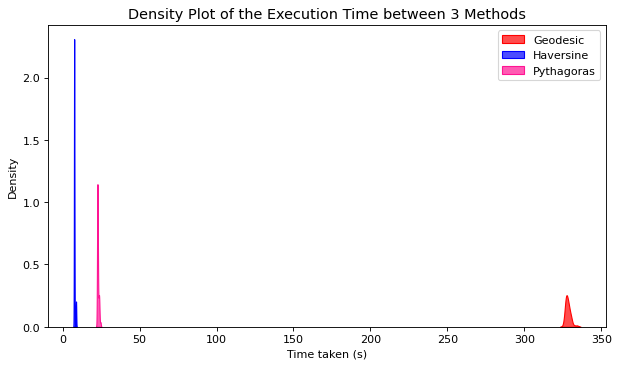

In [ ]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
df = pandas.DataFrame(Task2, columns=['No.','Geodesic','Haversine','Pythagoras']) 
 
# plotting both distibutions on the same figure
fig = sns.kdeplot(df['Geodesic'], shade=True, color="r", label="Geodesic", alpha=.7)
fig = sns.kdeplot(df['Haversine'], shade=True, color="b", label="Haversine", alpha=.7)
fig = sns.kdeplot(df['Pythagoras'], shade=True, color="deeppink", label="Pythagoras", alpha=.7)


plt.title('Density Plot of the Execution Time between 3 Methods', fontsize=13)
plt.xlabel('Time taken (s)')
plt.ylabel('Density')
plt.legend()
plt.show()